In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import configparser
import os

config = configparser.ConfigParser()
config.read('./config.ini')

['./config.ini']

In [2]:
ground_truth =torch.load('./.data/SyntheticNL/test_filter/ground_truth.pt')
state = torch.load('./.data/SyntheticNL/test_filter/state.pt')
measurement = torch.load('./.data/SyntheticNL/test_filter/obs.pt')

C:\Users\minhy\AppData\Local\Temp\ipykernel_25148\809852505.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ground_truth =torch.load('./.data/SyntheticNL/test_filter/gro

In [3]:
EKF_x_all = torch.load('./.data/SyntheticNL/test_filter/EKF x_hat.pt')
EKF_cov_all = torch.load('./.data/SyntheticNL/test_filter/EKF cov_hat.pt')

KN_x_all = torch.load('./.data/SyntheticNL/test_filter/KN v1 x_hat.pt')
KN_cov_all = torch.load('./.data/SyntheticNL/test_filter/KN v1 cov_hat.pt')

SKN_x_all = torch.load('./.data/SyntheticNL/test_filter/SKN x_hat.pt')
SKN_cov_all = torch.load('./.data/SyntheticNL/test_filter/SKN cov_hat.pt')
SKN_Pk_all = torch.load('./.data/SyntheticNL/test_filter/SKN Pk_hat.pt')
SKN_Sk_all = torch.load('./.data/SyntheticNL/test_filter/SKN Sk_hat.pt')

SKN_Sym_x_all = torch.load('./.data/SyntheticNL/test_filter/CKN x_hat.pt')
SKN_Sym_cov_all = torch.load('./.data/SyntheticNL/test_filter/CKN cov_hat.pt')
SKN_Sym_Pk_all = torch.load('./.data/SyntheticNL/test_filter/CKN Pk_hat.pt')
SKN_Sym_Sk_all = torch.load('./.data/SyntheticNL/test_filter/CKN Sk_hat.pt')


C:\Users\minhy\AppData\Local\Temp\ipykernel_25148\2596812023.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  EKF_x_all = torch.load('./.data/SyntheticNL/test_filter/EKF 

In [4]:
T = ground_truth.shape[-1]
t = torch.arange(0, T)

n_data = measurement.shape[0]
data_number = 0

mean_EKF_x = torch.mean(EKF_x_all, dim=0)
mean_KN_x = torch.mean(KN_x_all, dim=0)
mean_SKN_x = torch.mean(SKN_x_all, dim=0)
mean_SKN_Sym_x = torch.mean(SKN_Sym_x_all, dim=0)

e_EKF = torch.mean(EKF_x_all- state, dim=0)
e_KN = torch.mean(KN_x_all- state, dim=0)
e_SKN = torch.mean(SKN_x_all- state, dim=0)
e_SKN_Sym = torch.mean(SKN_Sym_x_all- state, dim=0)

e_EKF_all = EKF_x_all - state
e_KN_all = KN_x_all - state
e_SKN_all = SKN_x_all - state
e_SKN_Sym_all = SKN_Sym_x_all - state

# Extract diagonal elements from each 2x2 covariance matrix
EKF_cov = torch.zeros_like(EKF_x_all)
KN_cov = torch.zeros_like(KN_x_all)
SKN_cov = torch.zeros_like(SKN_x_all)
SKN_Sym_cov = torch.zeros_like(SKN_Sym_x_all)

for i in range(n_data):
    EKF_cov[i] = (torch.diagonal(EKF_cov_all[i], dim1=-2, dim2=-1)).T
    KN_cov[i] = (torch.diagonal(KN_cov_all[i], dim1=-2, dim2=-1)).T
    SKN_cov[i] = (torch.diagonal(SKN_cov_all[i], dim1=-2, dim2=-1)).T
    SKN_Sym_cov[i] = (torch.diagonal(SKN_Sym_cov_all[i], dim1=-2, dim2=-1)).T

e1_EKF_max = torch.max(torch.abs(e_EKF_all), dim=0)[0]
e1_KN_max = torch.max(torch.abs(e_KN_all), dim=0)[0]
e1_SKN_max = torch.max(torch.abs(e_SKN_all), dim=0)[0]
e1_SKN_Sym_max = torch.max(torch.abs(e_SKN_Sym_all), dim=0)[0]

e1_EKF_max_comb = torch.max(torch.sum(torch.abs(e_EKF_all), axis=1), dim=0)[0]
e1_KN_max_comb = torch.max(torch.sum(torch.abs(e_KN_all), axis=1), dim=0)[0]
e1_SKN_max_comb = torch.max(torch.sum(torch.abs(e_SKN_all), axis=1), dim=0)[0]
e1_SKN_Sym_max_comb = torch.max(torch.sum(torch.abs(e_SKN_Sym_all), axis=1), dim=0)[0]

e2_EKF_max = torch.max(e_EKF_all ** 2 , dim=0)[0]
e2_KN_max = torch.max(e_KN_all ** 2, dim=0)[0]
e2_SKN_max = torch.max(e_SKN_all ** 2, dim=0)[0]
e2_SKN_Sym_max = torch.max(e_SKN_Sym_all ** 2, dim=0)[0]

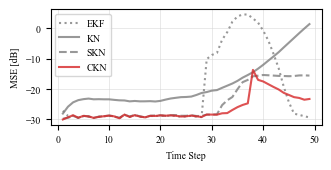

tensor(-4.6841)
tensor(-9.9911)
tensor(-20.5816)
tensor(-23.8362)


In [5]:
EKF_RMSE = torch.sum(torch.sum(e_EKF_all ** 2, dim=1), dim=0) / n_data
KN_RMSE = torch.sum(torch.sum(e_KN_all ** 2, dim=1), dim=0) / n_data
SKN_RMSE = torch.sum(torch.sum(e_SKN_all ** 2, dim=1), dim=0) / n_data
SKN_Sym_RMSE = torch.sum(torch.sum(e_SKN_Sym_all ** 2, dim=1), dim=0) / n_data

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 7

fontsize = 7
labelsize = fontsize
linewidth = 1.5

# Plot RMSE for each filter
fig, ax = plt.subplots(figsize=(3.5, 1.5))  # Specify figure size

ax.plot(t[1:], 10*torch.log10(EKF_RMSE[1:]),  'tab:gray', linewidth=linewidth, linestyle='dotted', alpha =0.8, label='EKF')
ax.plot(t[1:], 10*torch.log10(KN_RMSE[1:]),  'tab:gray', linewidth=linewidth, linestyle='solid', alpha =0.8, label='KN')
ax.plot(t[1:], 10*torch.log10(SKN_RMSE[1:]),  'tab:gray', linewidth=linewidth, linestyle='dashed', alpha =0.8,  label='SKN')
ax.plot(t[1:], 10*torch.log10(SKN_Sym_RMSE[1:]),  'tab:red', linewidth=linewidth, linestyle='solid', alpha =0.8,  label='CKN')
# ax.title('Position')
ax.set_xlabel('Time Step')
ax.set_ylabel('MSE [dB]')
ax.legend(loc='upper left', fontsize=fontsize)
ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)  # Brighter grid lines
plt.savefig('ex2_RMSE.png', dpi=500, bbox_inches='tight')

plt.show()

norm_RMS1_ekf = 10*torch.log10(torch.sum(EKF_RMSE[1:])/(T-1))
norm_RMS1_kf = 10*torch.log10(torch.sum(KN_RMSE[1:])/(T-1))
norm_RMS1_skf = 10*torch.log10(torch.sum(SKN_RMSE[1:])/(T-1))
norm_RMS1_skf_sym = 10*torch.log10(torch.sum(SKN_Sym_RMSE[1:])/(T-1))


print(norm_RMS1_ekf)
print(norm_RMS1_kf)
print(norm_RMS1_skf)
print(norm_RMS1_skf_sym)

C:\Users\minhy\AppData\Local\Temp\ipykernel_25148\2708383422.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=0.2)


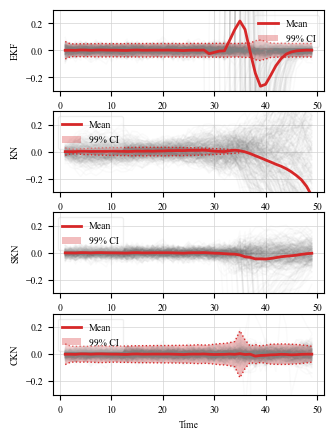

In [6]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 7

fontsize = 7
labelsize = fontsize
linewidth = 1

# Create a figure with subplots
fig, axes = plt.subplots(4, 1, figsize=(3.5, 5), gridspec_kw={'height_ratios': [1, 1, 1, 1], 'hspace': 0.25})  # Adjust hspace for tighter layout

# First subplot: EKF
upper_bound = 2 * torch.sqrt(EKF_cov[0, 1, 1:])
lower_bound = -2 * torch.sqrt(EKF_cov[0, 1, 1:])

ax1 = axes[0]
for i in range(n_data):
    ax1.plot(t[1:], e_EKF_all[i, 1, 1:], linewidth=1, color='tab:gray', alpha=0.03)

ax1.plot(t[1:], e_EKF[1, 1:], linewidth=2, color='tab:red', alpha=1, label='Mean')
ax1.fill_between(t[1:], upper_bound.numpy(), lower_bound.numpy(), color='tab:red', alpha=0.3, label='99% CI', edgecolor='none')  # Light Coral
ax1.plot(t[1:], upper_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax1.plot(t[1:], lower_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax1.legend(loc='upper right', fontsize=fontsize, frameon=True, fancybox=True, framealpha=0.3)

ax1.set_ylim([-0.3, 0.3])
ax1.set_ylabel('EKF', fontsize=fontsize)
ax1.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray', alpha=1)

# Second subplot: KN
upper_bound = 2 * torch.sqrt(KN_cov[0, 1, 1:])
lower_bound = -2 * torch.sqrt(KN_cov[0, 1, 1:])

ax2 = axes[1]
for i in range(n_data):
    ax2.plot(t[1:], e_KN_all[i, 1, 1:], linewidth=1, color='tab:gray', alpha=0.03)

ax2.plot(t[1:], e_KN[1, 1:], linewidth=2, color='tab:red', alpha=1, label='Mean')
ax2.fill_between(t[1:], upper_bound.numpy(), lower_bound.numpy(), color='tab:red', alpha=0.3, label='99% CI', edgecolor='none')  # Light Coral
ax2.plot(t[1:], upper_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax2.plot(t[1:], lower_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax2.legend(loc='upper left', fontsize=fontsize, frameon=True, fancybox=True, framealpha=0.3)

ax2.set_ylim([-0.3, 0.3])
ax2.set_ylabel('KN', fontsize=fontsize)
ax2.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray', alpha=1)

# Third subplot: SKN
upper_bound = 2 * torch.sqrt(SKN_cov[0, 1, 1:])
lower_bound = -2 * torch.sqrt(SKN_cov[0, 1, 1:])

ax3 = axes[2]
for i in range(n_data):
    ax3.plot(t[1:], e_SKN_all[i, 1, 1:], linewidth=1, color='tab:gray', alpha=0.03)

ax3.plot(t[1:], e_SKN[1, 1:], linewidth=2, color='tab:red', alpha=1, label='Mean')
ax3.fill_between(t[1:], upper_bound.numpy(), lower_bound.numpy(), color='tab:red', alpha=0.3, label='99% CI', edgecolor='none')  # Light Coral
ax3.plot(t[1:], upper_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax3.plot(t[1:], lower_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax3.legend(loc='upper left', fontsize=fontsize, frameon=True, fancybox=True, framealpha=0.3)

ax3.set_ylim([-0.3, 0.3])
ax3.set_ylabel('SKN', fontsize=fontsize)
ax3.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray', alpha=1)

# Fourth subplot: SKN-Sym
upper_bound = 2 * torch.sqrt(SKN_Sym_cov[0, 1, 1:])
lower_bound = -2 * torch.sqrt(SKN_Sym_cov[0, 1, 1:])

ax4 = axes[3]
for i in range(n_data):
    ax4.plot(t[1:], e_SKN_Sym_all[i, 1, 1:], linewidth=1, color='tab:gray', alpha=0.03)

ax4.plot(t[1:], e_SKN_Sym[1, 1:], linewidth=2, color='tab:red', alpha=1, label='Mean')
ax4.fill_between(t[1:], upper_bound.numpy(), lower_bound.numpy(), color='tab:red', alpha=0.3, label='99% CI', edgecolor='none')  # Light Coral
ax4.plot(t[1:], upper_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax4.plot(t[1:], lower_bound.numpy(), linestyle=':', color='tab:red', linewidth=1, alpha=1)
ax4.legend(loc='upper left', fontsize=fontsize, frameon=True, fancybox=True, framealpha=0.3)

ax4.set_ylim([-0.3, 0.3])
ax4.set_xlabel('Time', fontsize=fontsize)
ax4.set_ylabel('CKN', fontsize=fontsize)
ax4.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray', alpha=1)

# Adjust layout to make it more compact
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=0.2)

# Save the figure
plt.savefig('ex2_velocity_ci_comparison.png', dpi=500, bbox_inches='tight')

plt.show()